In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [361]:
df=pd.read_csv('E:\My projects\ML\codes\Fish.csv')
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [362]:
cols=["Length1","Length2","Length3","Height","Width"]
X=df[cols]
y=df["Weight"]

In [363]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [364]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [365]:
def cost_function(X,y,w,b):
    n=len(y)
    cost=np.sum((((X.dot(w)+b)-y)**2)/(2*n))
    return cost

In [366]:
def gradient_decent(X,y,w,b,lr=0.03,epochs=2500):
    n=len(y)
    costs=[0]*epochs

    for epochs in range(epochs):
        z=X.dot(w) +b
        loss=z-y
        dw=X.T.dot(loss)/n
        db=np.sum(loss)/n

        w=w-lr*dw
        b=b-lr*db

        cost=cost_function(X,y,w,b)
        costs[epochs]=cost
    
    return w,b,costs


In [367]:
w=np.random.randn(X_train.shape[1])
b=0
weights,bias,costs=gradient_decent(X_train,y_train,w,b,epochs=3000)


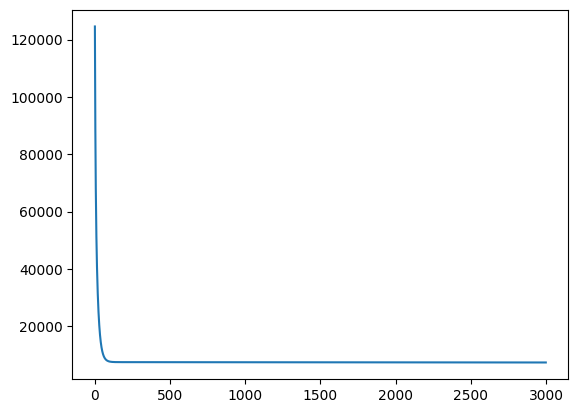

In [368]:
plt.plot(costs)
plt.show()

In [369]:
def linear_regression(X,w,b):
    return X.dot(w)+b


In [370]:
def accruracy(y_pred,y):
    real=np.sum((y_pred-y)**2)
    test=np.sum((y-y.mean())**2)

    percentage=1-real/test

    return percentage

In [371]:
y_pred=linear_regression(X_test,weights,bias)


In [372]:
score=accruracy(y_pred,y_test)
print(score)

0.8741945294476118
